In [1]:
import numpy as np 
import pandas as pd

In [2]:
#encoding parameter
df = pd.read_csv('spam.csv',encoding="latin-1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
df.corr()

C:\Users\amitm\AppData\Local\Temp\ipykernel_23708\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


""


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
#label encoder is used for encoding output column
#and for input column ordinal encoding is used
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# check for duplicate values 
df.duplicated().sum()

403

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

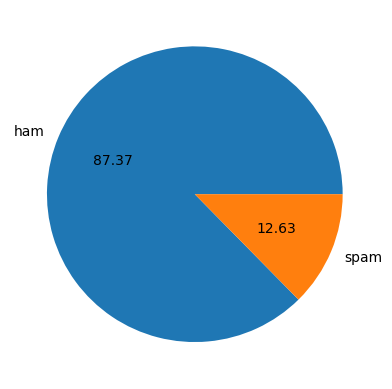

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# we can see data is imbalanced as their are lots of ham and low amount of spam


In [22]:
#natural language toolkit library
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amitm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters']=df['text'].apply(len)

C:\Users\amitm\AppData\Local\Temp\ipykernel_23708\399031894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#num of words
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

C:\Users\amitm\AppData\Local\Temp\ipykernel_23708\3654218632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))


In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
#num of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\amitm\AppData\Local\Temp\ipykernel_23708\4054462362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#for analyzing ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
 #for analyzing spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
#hist plot for both spam and ham
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

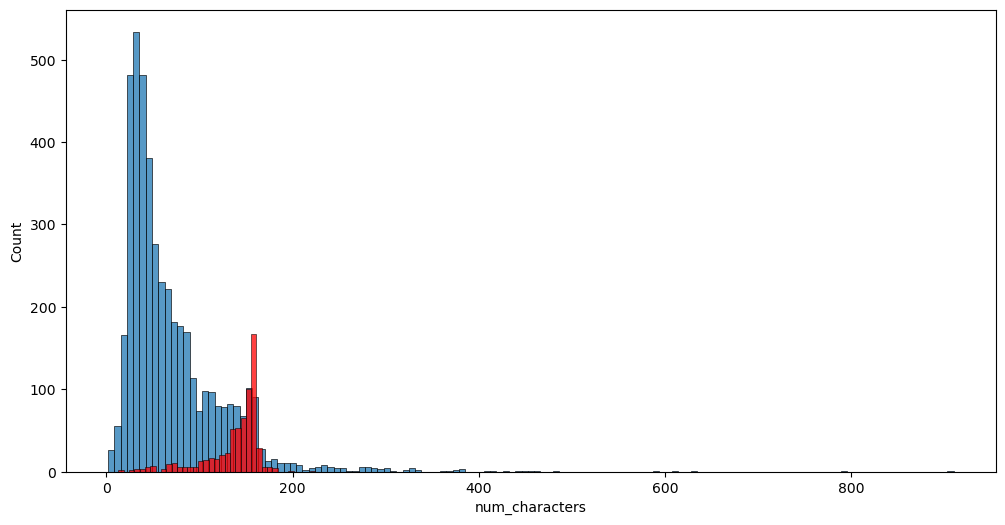

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

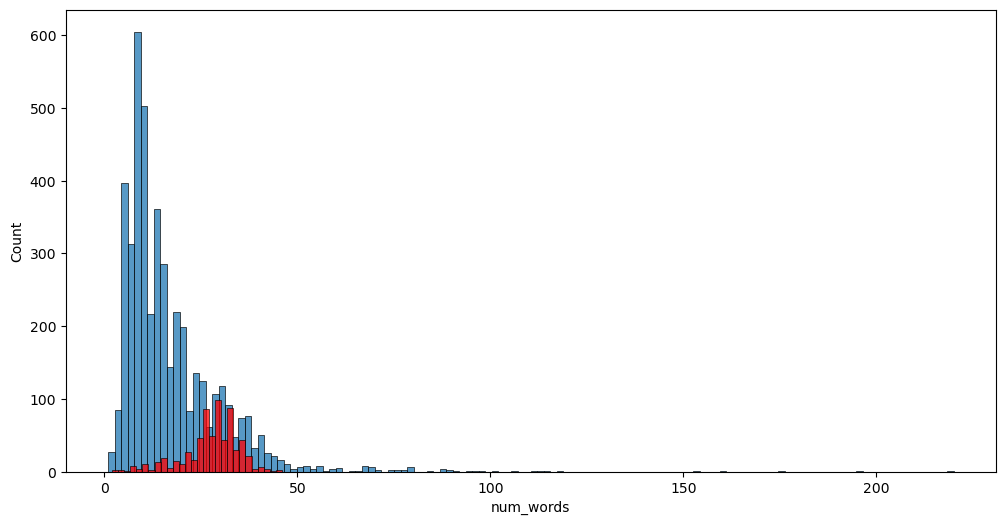

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

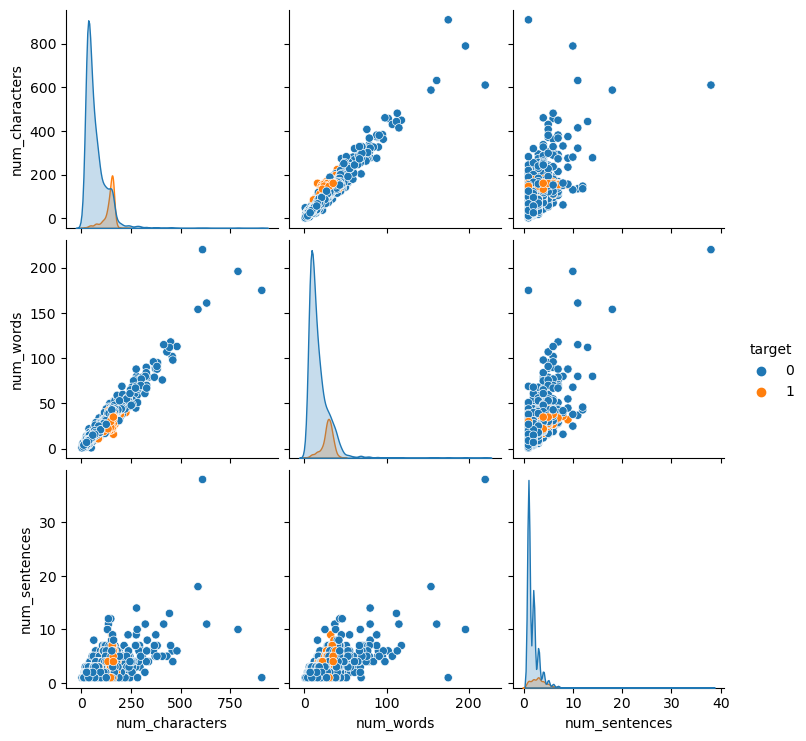

In [36]:
sns.pairplot(df,hue='target')

In [37]:
# correlation coefficient
df.corr()

C:\Users\amitm\AppData\Local\Temp\ipykernel_23708\1466808155.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


In [ ]:
nltk.download('all')

In [ ]:
pip install --upgrade nltk

C:\Users\amitm\AppData\Local\Temp\ipykernel_23708\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

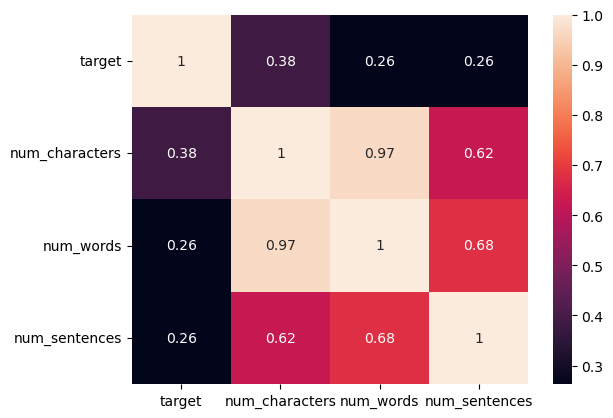

In [38]:
sns.heatmap(df.corr(),annot=True)

## 3.Data Preprocessing(here we are having textual data)
    #a. Lowercase:-converting into lowercase
    #b. Tokenization:-break into words
    #c. Removal special characters
    #d. Removal stop words and punctuation:-like is,are,wow etc
    #e. stemming:-ek hi type ke word like dance ,dancing, danced 
    ko ek word me convert krna like dance

In [129]:
def transform_text(text):
    #a.
    text = text.lower()
    #b.
    text = nltk.word_tokenize(text)
    #c.
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    #d.
    from nltk.corpus import stopwords
    stopwords.words('english')
    
    text = y[:]
    y.clear()
    
    for i in text:
         if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
                
    #e.            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i)) 
        
    return " ".join(y)

In [130]:
#for stopwords
from nltk.corpus import stopwords
stopwords.words('english')
#for punctuation marks
import string
string.punctuation
#for stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("Loved")

'love'

In [131]:
transform_text("ARE YOU Married..%% %")

'marri'

In [132]:
pip install --upgrade nltk

In [133]:
nltk.download('all')

In [134]:
transform_text('Did you liked my presentation on ML?')

'like present ml'

In [135]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [136]:
#transformed column
# df['text'].apply(transform_text)

In [137]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\amitm\AppData\Local\Temp\ipykernel_23708\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [138]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [139]:
df['transformed_text'][2000]

'b go 2 sch mon si need 2 take smth'

In [140]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color = 'white')

In [141]:
wc

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   target            5169 non-null   int32 
 1   text              5169 non-null   object
 2   num_characters    5169 non-null   int64 
 3   num_words         5169 non-null   int64 
 4   num_sentences     5169 non-null   int64 
 5   transformed_text  5169 non-null   object
dtypes: int32(1), int64(3), object(2)
memory usage: 391.5+ KB


In [143]:
df['transformed_text'] = df['transformed_text'].astype(str)

C:\Users\amitm\AppData\Local\Temp\ipykernel_23708\4073745127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['transformed_text'].astype(str)


In [144]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

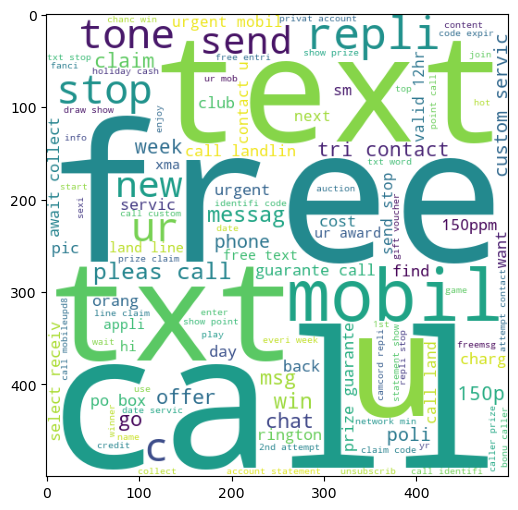

In [145]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [146]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

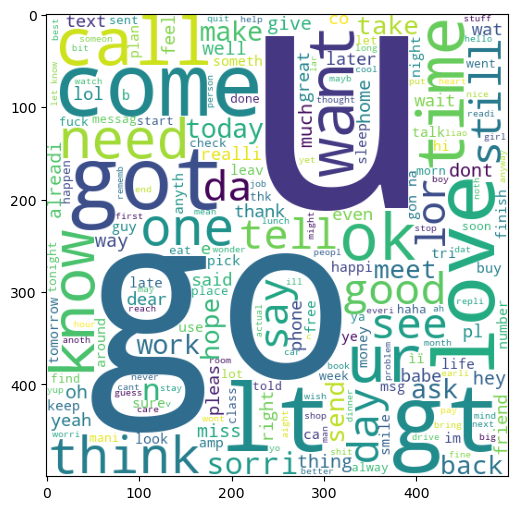

In [147]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [148]:
#to see top 30 word or top 50 words in spam
#custom code we have to write
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [149]:
len(spam_corpus)

9939

In [150]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [151]:
# from collections import Counter
# sns.barplot(x=df2[0],y=df2[1],data=df2)
# plt.xticks(rotation='vertical')
# plt.show()

In [152]:
#to see top 30 word or top 50 words in ham 
#custom code we have to write
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [153]:
len(ham_corpus)


35404

In [154]:
df3 = pd.DataFrame(Counter(ham_corpus).most_common(30))
df3

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


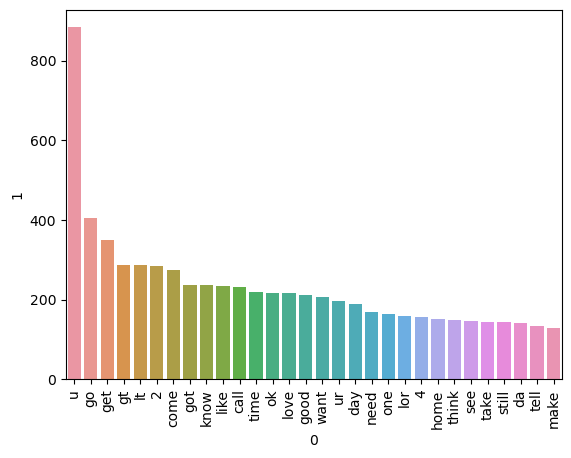

In [155]:
from collections import Counter
sns.barplot(x=df3[0],y=df3[1],data=df3)
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [156]:
#our model will be naive bayes as naives bayes works well on textual data

In [158]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [159]:
#Text Vectorization
#using Bag of Words

In [160]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [107]:
# #To Know about TfidfVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Example documents
# documents = [
#     "This is the first document.",
#     "This document is the second document.",
#     "And this is the third one.",
#     "Is this the first document?",
# ]

# # Create the TfidfVectorizer
# vectorizer = TfidfVectorizer()

# # Fit and transform the documents
# tfidf_matrix = vectorizer.fit_transform(documents)

# # Get the feature names (words)
# feature_names = vectorizer.get_feature_names_out()

# # Convert the TF-IDF matrix to a dense array for better readability
# dense_matrix = tfidf_matrix.todense()

# # Create a DataFrame for better visualization (optional)
# import pandas as pd
# df_temp = pd.DataFrame(dense_matrix, columns=feature_names)

# # Print the TF-IDF matrix or DataFrame
# print(df_temp)


        and  document     first        is       one    second       the  \
0  0.000000  0.469791  0.580286  0.384085  0.000000  0.000000  0.384085   
1  0.000000  0.687624  0.000000  0.281089  0.000000  0.538648  0.281089   
2  0.511849  0.000000  0.000000  0.267104  0.511849  0.000000  0.267104   
3  0.000000  0.469791  0.580286  0.384085  0.000000  0.000000  0.384085   

      third      this  
0  0.000000  0.384085  
1  0.000000  0.281089  
2  0.511849  0.267104  
3  0.000000  0.384085  


In [161]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [162]:
X.shape

(5169, 3000)

In [163]:
y = df['target'].values

In [164]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [165]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [166]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [167]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [168]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [169]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [170]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [118]:
# here accuracy is not a reliable measure 
#here precision is most important as data is imbalanced


# When dealing with imbalanced datasets, where one class significantly outnumbers
# the other, accuracy may not be a reliable metric for evaluating model performance.
# This is because a classifier could achieve high accuracy by simply predicting
# the majority class all the time, while performing poorly on the minority class.

# In such cases, precision, recall, and the F1 score become more important metrics
# to consider:

In [119]:
#so here we will consider 
#tfidf -->MNB
#inside tfidf there is a hidden parameter inside it named maxfeature
# which is used to restrict the number of words 

In [120]:
# pip install --upgrade scikit-learn


In [121]:
# pip install xgboost

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [123]:
svc = SVC(kernel='sigmoid',gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators = 50,random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50,random_state = 2)
bc = BaggingClassifier(n_estimators = 50 , random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50,random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50,random_state = 2)
xgb = XGBClassifier(n_estimators = 50,random_state = 2)

In [124]:
clfs = {
    "svc" : svc,
    "KN" : knc,
    "NB" : mnb,
    "DT" : dtc,
    "LR" : lrc,
    "RF" : rfc,
    "AdaBoost" : abc,
    "BgC" : bc,
    "ETC" : etc,
    "GBDT" : gbdt,
    "xgb" : xgb
} 

In [125]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [89]:
train_classifier(xgb,X_train,y_train,X_test,y_test)

(0.9671179883945842, 0.9262295081967213)

In [90]:
%%time
n_job=-1
nam = []
acc_sc = []
pre_sc = []

for name,clf in clfs.items():
    curr_acc,curr_pre = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("for " ,name)
    print("Accuracy ",curr_acc)
    print("Precision ",curr_pre)
    
    nam.append(name)
    acc_sc.append(curr_acc)
    pre_sc.append(curr_pre)

for  svc
Accuracy  0.9758220502901354
Precision  0.9747899159663865
for  KN
Accuracy  0.9052224371373307
Precision  1.0
for  NB
Accuracy  0.9709864603481625
Precision  1.0
for  DT
Accuracy  0.9294003868471954
Precision  0.8282828282828283
for  LR
Accuracy  0.9584139264990329
Precision  0.9702970297029703
for  RF
Accuracy  0.9758220502901354
Precision  0.9829059829059829
for  AdaBoost
Accuracy  0.960348162475822
Precision  0.9292035398230089
for  BgC
Accuracy  0.9584139264990329
Precision  0.8682170542635659
for  ETC
Accuracy  0.9748549323017408
Precision  0.9745762711864406
for  GBDT
Accuracy  0.9468085106382979
Precision  0.9191919191919192
for  xgb
Accuracy  0.9671179883945842
Precision  0.9262295081967213
CPU times: total: 1min 38s
Wall time: 2min 6s


In [91]:
performance_df = pd.DataFrame({"Algorithm" : nam,"Accuracy" : acc_sc,"Precision" : pre_sc}).sort_values("Precision",ascending=False)

In [92]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,svc,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [93]:
performance_df1 = pd.melt(performance_df,id_vars = "Algorithm")

In [94]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,svc,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


In [95]:
#just cheking whether it is performing better or not
#voting classifier
svc = SVC(kernel="sigmoid",gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [97]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [98]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [99]:
y_pred = voting.predict(X_test)
print("Accuracy ",accuracy_score(y_test,y_pred))
print("Precision ",precision_score(y_test,y_pred))

Accuracy  0.9816247582205029
Precision  0.9917355371900827


In [100]:
#just cheking whether it is performing better or not
#applying Stacking
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [102]:
from sklearn.ensemble import StackingClassifier

In [103]:
clf = StackingClassifier(estimators= estimators,final_estimator = final_estimator)

In [104]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy ",accuracy_score(y_test,y_pred))
print("Precision ",precision_score(y_test,y_pred))

Accuracy  0.9796905222437138
Precision  0.9465648854961832


In [ ]:
#since the above two model are not performing better than mnb 
#therefor our model will be mnb

In [171]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))